In [3]:
import numpy as np
import numpy.linalg as la
from scipy.linalg import sqrtm
from matplotlib import pyplot as plt

n = 30
w = np.arange(1,n**2+1)
www = w.reshape((n,n)).T
A = np.sin(93*www**3)
Q = A.T @ A
b = 10*np.sin(27*np.arange(1,n+1)**3)
c = b @ la.solve(Q,b)+1
DD = np.sin(15*www**3)
Z = sqrtm(la.inv(DD@DD.T))
D = Z @ DD

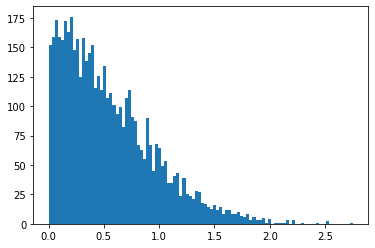

3.026616593033955


In [40]:
e = np.ones(n)
niter = 1001

soft_thresh = lambda x, t: np.sign(x) * np.maximum(np.abs(x) - t, 0)
objfun = lambda x: np.sqrt(x@Q@x+2*b@x+c) + 0.2*np.linalg.norm(D@x+e,1) 
difffun = lambda x: np.sqrt(x@Q@x+2*b@x+c)

def gradf(x):
    return (Q@x+2*b)/(objfun(x))

def proxg(x, alpha):
    Dx = D@x
    return x + D.T@(soft_thresh(Dx,alpha) - Dx)

# estimate Lipschitz constant
n2 = 5000
sig = 1e4
xs = sig*np.random.randn(n2,n)
ys = sig*np.random.randn(n2,n)
Li = np.zeros(n2)

for i in range(n2):
    # Li[i] = np.linalg.norm(gradf(xs[i]) - gradf(ys[i]), 2) / np.linalg.norm(xs[i]-ys[i],2)
    Li[i] = np.abs(difffun(xs[i]) - difffun(ys[i])) / np.linalg.norm(xs[i]-ys[i],2)

plt.figure()
plt.hist(Li, bins=100)
plt.show()

L = 1.1*np.max(Li)
print(L)

Proximal gradient

In [41]:
k = 1
x1 = np.ones(n)
obj = np.zeros(niter)

while k<niter+1:
    x1 = proxg(x1-1/L*gradf(x1), 0.2/L)
    obj[k-1] = objfun(x1)
    k +=1

FISTA

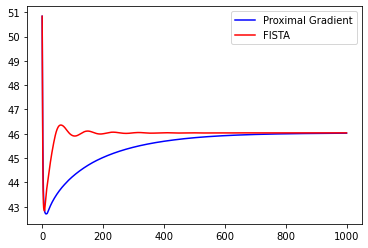

[ 1.28719385 -1.58022487  2.50815705 -3.8427699  -2.46575041 -3.65363308
  0.77807193 -2.68849762  1.93728547 -2.99245057  0.14295575 -0.73326372
  0.09646942  0.79298089  0.08207584 -3.89326634 -1.24816024 -3.1848812
 -3.16454199 -1.79543236 -3.76238055 -0.54005859  2.32073312 -3.35094059
  1.64626993  0.87047007  2.90954843  3.34753827  1.30272139  1.50156146]


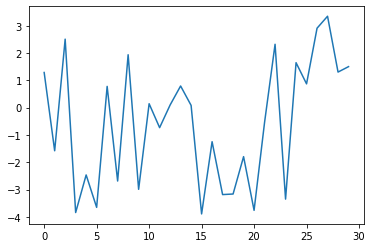

In [42]:
k = 1
t = 1
x2 = np.ones(n)
y = np.ones(n)
obj2 = np.zeros(niter)

while k<niter+1:
    told = t
    xold = np.copy(x2) 

    x2 = proxg(y-1/L*gradf(y), 0.2/L)
    obj2[k-1] = objfun(x2)
    t = (1+np.sqrt(1+4*told**2))/2
    y = x2 + (told-1)/t*(x2-xold)

    k +=1

plt.figure()
plt.plot(obj, 'b', label='Proximal Gradient')
plt.plot(obj2, 'r', label='FISTA')
plt.legend()
plt.show()

print(x2)

plt.figure()
plt.plot(x2)
plt.show()